In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


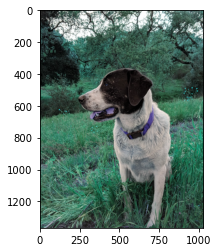

In [10]:
img = cv2.imread("Bruno.jpg")
plt.imshow(img)
